<h1 style="color:blue; text-align:center;"> Stage M1 Energie : Inter-comparison and validation against in-situ measurements of satellite estimates of incoming solar radiation for Indien Ocean
</h1>

<h2 style="color:red; text-align:center;"> Importing raw data
</h2>

# Code for Importing all data of SWOI station with netCDF files

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import sys
from datetime import datetime
from siphon.catalog import TDSCatalog

import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr # aide la convertion en dataframe 

from datetime import datetime, timedelta
import os.path, os
from siphon.catalog import TDSCatalog # websvr giving access to data and metadata
from urllib.error import HTTPError

import requests
from bs4 import BeautifulSoup

import time



url = "https://galilee.univ-reunion.fr/thredds/catalog/dataStations/catalog.html"

def liste_of_link(url):
    # Début du compteur de temps
    start_time = time.time()
    L=[]
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Trouver toutes les balises 'a' qui représentent les dossiers
        folder_links = soup.find_all('a', href=True)
        # Extraire les noms de dossier des liens
        Names_of_country_in_SWOI = [folder.text.strip().rstrip('/') for folder in folder_links if folder.text.strip().endswith('/')]
        # Afficher les noms de dossier
        print("Names of country in SWOI:",Names_of_country_in_SWOI)
    else:
        print("Erreur lors de la requête HTTP :", response.status_code)

    for i in range(len(Names_of_country_in_SWOI)):
        url_1 = f"https://galilee.univ-reunion.fr/thredds/catalog/dataStations/{Names_of_country_in_SWOI[i]}/catalog.html"
        link_data=f'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/{Names_of_country_in_SWOI[i]}'
        response_1 = requests.get(url_1)
        if response_1.status_code == 200:
            soup = BeautifulSoup(response_1.content, 'html.parser')
            # Trouver toutes les balises 'a' qui représentent les dossiers
            folder_links = soup.find_all('a', href=True)
            # Extraire les noms de dossier des liens
            folder_names = [folder.text.strip().rstrip('/') for folder in folder_links if folder.text.strip().endswith('/')]
            # Afficher les noms de dossier
            print("Noms des dossiers :",folder_names)
        else:
            print("Erreur lors de la requête HTTP :", response.status_code)
        sous_liste=[]
        for j in range(len(folder_names)):
            url_2 = f"https://galilee.univ-reunion.fr/thredds/catalog/dataStations/{Names_of_country_in_SWOI[i]}/{folder_names[j]}/catalog.html"
            link_data_1=f'{link_data}/{folder_names[j]}'
            response_2 = requests.get(url_2)
            if response_2.status_code == 200:
                soup = BeautifulSoup(response_2.content, 'html.parser')
                # Trouver toutes les balises 'a' qui représentent les dossiers
                folder_links = soup.find_all('a', href=True)
                # Extraire les noms de dossier des liens
                folder_years = [folder.text.strip().rstrip('/') for folder in folder_links if folder.text.strip().endswith('/')]
                # Afficher les noms de dossier
                print("Available years :",folder_years)
            else:
                print("Erreur lors de la requête HTTP :", response.status_code)
            sous_sous_liste=[]
            sous_sous_liste.append(folder_names[j])
            for k in range(len(folder_years)):
                url_3 = f"https://galilee.univ-reunion.fr/thredds/catalog/dataStations/{Names_of_country_in_SWOI[i]}/{folder_names[j]}/{folder_years[k]}/catalog.html"
                link_data_2=f'{link_data_1}/{folder_years[k]}'
                response_3 = requests.get(url_3)
                if response_3.status_code == 200:
                    soup_2 = BeautifulSoup(response_3.content, 'html.parser')
                    # Trouver tous les liens se terminant par ".nc"
                    nc_links = soup_2.find_all('a', href=lambda href: href and href.endswith('.nc'))
                    # Extraire les noms des fichiers .nc
                    nc_files = [nc_link.text.strip() for nc_link in nc_links]
                    # Afficher les noms des fichiers .nc
                    print("Fichiers .nc disponibles :")
                    for nc_file in nc_files:
                        print(nc_file)
                else:
                    print("Erreur lors de la requête HTTP :", response_2.status_code)
                
                for l in range(len(nc_files)):
                    link_data_3=f'{link_data_2}/{nc_files[l]}'
                    sous_sous_liste.append(f'{link_data_3}')
            sous_liste.append(sous_sous_liste)
        L.append(sous_liste)
    # Fin du compteur de temps
    end_time = time.time()
    # Calcul du temps écoulé
    execution_time = end_time - start_time
    print("Temps d'exécution:", execution_time, "secondes")
    return L
liste_of_data=liste_of_link(url)

Names of country in SWOI: ['South_Africa', 'Seychelles', 'Mauritius', 'Madagascar', 'La_Reunion', 'Comores']
Noms des dossiers : ['durban']
Available years : ['2018', '2017', '2016', '2015', '2014', '2013']
Fichiers .nc disponibles :
durban_2018-10.nc
durban_2018-09.nc
durban_2018-08.nc
durban_2018-07.nc
durban_2018-06.nc
durban_2018-05.nc
durban_2018-04.nc
durban_2018-03.nc
durban_2018-02.nc
durban_2018-01.nc
Fichiers .nc disponibles :
durban_2017-12.nc
durban_2017-11.nc
durban_2017-10.nc
durban_2017-09.nc
durban_2017-08.nc
durban_2017-07.nc
durban_2017-06.nc
durban_2017-05.nc
durban_2017-04.nc
durban_2017-03.nc
durban_2017-02.nc
durban_2017-01.nc
Fichiers .nc disponibles :
durban_2016-12.nc
durban_2016-11.nc
durban_2016-10.nc
durban_2016-09.nc
durban_2016-08.nc
durban_2016-07.nc
durban_2016-06.nc
durban_2016-05.nc
durban_2016-04.nc
durban_2016-03.nc
durban_2016-02.nc
durban_2016-01.nc
Fichiers .nc disponibles :
durban_2015-12.nc
durban_2015-11.nc
durban_2015-10.nc
durban_2015-09.nc
d

In [3]:
liste_of_data

[[['durban',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-10.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-09.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-08.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-07.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-06.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-05.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-04.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-03.nc',
   'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-02.nc',
   'https://gal

In [2]:
# data of South Africa
south_africa = liste_of_data[0]
print(f'Data of South Africa : {south_africa}')

# data of Seychelles
seychelle = liste_of_data[1]
print("\n")
print(f'Data of Seychelles : {seychelle}')


# data of Mauritius
mauritius = liste_of_data[2]
print("\n")
print(f'Data of Mauritius : {mauritius}')


# data of Madagascar
mada = liste_of_data[3]
print("\n")
print(f'Data of Madagascar : {mada}')

# data of La Réunion
reunion = liste_of_data[4]
print("\n")
print(f'Data of Reunion : {reunion}')

# data of Comores
comores = liste_of_data[5]
print("\n")
print(f'Data of Comores : {comores}')


Data of South Africa : [['durban', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-10.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-09.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-08.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-07.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-06.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-05.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-04.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-03.nc', 'https://galilee.univ-reunion.fr/thredds/dodsC/dataStations/South_Africa/durban/2018/durban_2018-02.nc', 'https://galilee.uni

In [6]:
import xarray as xr
import pandas as pd



# Fonction de tri personnalisée ( permet de mettre les GHI en premier dans la liste )
def custom_sort(item):
    if 'GHI' in item:
        return (0, item)  # Mettre les chaînes contenant 'GHI' en premier
    else:
        return (1, item)  # Mettre les autres chaînes après



# Conversion dataframe
def nc_to_dataframe_second(ncfile):
    liste_variable = []
    for varname, var in ncfile.variables.items():
        if hasattr(var, "standard_name"):
            liste_variable.append(varname)

    # Filtrage des chaînes de caractères contenant 'DHI' ou 'GHI'
    resultat = [var for var in liste_variable if 'DHI' in var or 'GHI' in var]
    # Réorganisation de la liste
    resultat_triee = sorted(resultat, key=custom_sort)

    # Extract the time and variables arrays from the netCDF file
    time_unix = ncfile.variables['time'][:]
    variable_arrays = [ncfile.variables[var][:] for var in resultat_triee]

    # Convert the time to pandas datetime format with UTC timezone and then to local time
    time_utc = pd.to_datetime(time_unix, unit='s', origin='unix', utc=True).tz_convert('Indian/Reunion')
    time_local = time_utc.tz_convert('Indian/Reunion')
    #print(time_local)

    # Create a dataframe with the variables arrays
    df = pd.DataFrame(dict(zip(resultat_triee, variable_arrays)), index=time_local)
    
    ncfile.close() # Close the NetCDF file properly
    
    return df



def nc_to_dataframe(nc_file_paths):
    # Initialiser une liste pour stocker les DataFrames pour chaque fichier .nc
    dfs = []
    # Parcourir chaque lien .nc dans la liste
    for nc_file_path in reversed(nc_file_paths):
        ncfile = nc.Dataset(nc_file_path)
        df = nc_to_dataframe_second(ncfile)

        # Convertir les données en un DataFrame et l'ajouter à la liste
        dfs.append(df)

    # Concaténer tous les DataFrames en un seul DataFrame
    final_df = pd.concat(dfs)

    return final_df

def affiche_data_reunion(liste):
    name_station=liste[0]
    liste_data=liste[1:]
    df=nc_to_dataframe(liste_data)
    return name_station , df


def courbe_ghi_dhi(liste):
    name , df_station = affiche_data_reunion(liste)
    i=0
    ligne , colon = df_station.shape
    plt.figure(figsize=(10, 5))  # Taille de la figure
    for col in df_station.columns:
        i=i+1
        print(f'Colonne :{i}/{colon}') 
        plt.plot(df_station.index, df_station[col], label=col)
        plt.legend(loc='best')
    
    # Ajouter le titre et les légendes
    plt.title(f'DHI and GHI for sation of {name}')
    plt.xlabel('Time [UTC+4]')
    plt.ylabel('Irradiance [$W/m^2$]')
    
    # Afficher le graphique
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return 

## South Africa

In [20]:
name_station_0 , df_station_0 = affiche_data_reunion(south_africa[0])
print(f'Station of {name_station_0}')

Station of durban


In [23]:
# Enregistrez la DataFrame dans un fichier CSV
df_station_0.to_csv('data_brute/south_africa/durban_irrad.csv', sep=';', index=True)  

In [43]:
# Importer un fichier CSV avec un séparateur ';' et sans en-têtes de colonnes
df_test = pd.read_csv('data_brute/south_africa/durban_irrad.csv', sep=';', index_col='Unnamed: 0')
df_test

,GHI_pp01_Avg,DHI_pp01_Avg
2013-08-01 04:00:00+04:00,NaN,NaN
2013-08-01 04:01:00+04:00,NaN,NaN
2013-08-01 04:02:00+04:00,NaN,NaN
2013-08-01 04:03:00+04:00,NaN,NaN
2013-08-01 04:04:00+04:00,NaN,NaN
...,...,...
2018-10-25 03:55:00+04:00,NaN,NaN
2018-10-25 03:56:00+04:00,NaN,NaN
2018-10-25 03:57:00+04:00,NaN,NaN
2018-10-25 03:58:00+04:00,NaN,NaN


## Seychelles

In [21]:
name_station_1 , df_station_1 = affiche_data_reunion(seychelle[0])
print(f'Station of {name_station_1}')
name_station_2 , df_station_2 = affiche_data_reunion(seychelle[1])
print(f'Station of {name_station_2}')


Station of anseboileau
Station of amitie


In [35]:
df_station_1.to_csv(f'data_brute/seychelles/{name_station_1}_irrad.csv', sep=';', index=True)  

In [36]:
df_station_2.to_csv(f'data_brute/seychelles/{name_station_2}_irrad.csv', sep=';', index=True)

## Mauritius

In [4]:
name_station_3 , df_station_3 = affiche_data_reunion(mauritius[0])
print(f'Station of {name_station_3}')

name_station_4 , df_station_4 = affiche_data_reunion(mauritius[1])
print(f'Station of {name_station_4}')

name_station_5 , df_station_5 = affiche_data_reunion(mauritius[2])
print(f'Station of {name_station_5}')

name_station_6 , df_station_6 = affiche_data_reunion(mauritius[3])
print(f'Station of {name_station_6}')



Station of vacoas
Station of uomreduit
Station of reservetortues
Station of mrtbrasdeau


In [5]:
df_station_3.to_csv(f'data_brute/mauritius/{name_station_3}_irrad.csv', sep=';', index=True)
df_station_4.to_csv(f'data_brute/mauritius/{name_station_4}_irrad.csv', sep=';', index=True)  
df_station_5.to_csv(f'data_brute/mauritius/{name_station_5}_irrad.csv', sep=';', index=True)  
df_station_6.to_csv(f'data_brute/mauritius/{name_station_6}_irrad.csv', sep=';', index=True)  

## Madagascar

In [4]:
len(mada)

2

In [7]:
name_station_7 , df_station_7 = affiche_data_reunion(mada[0])
print(f'Station of {name_station_7}')

name_station_8 , df_station_8 = affiche_data_reunion(mada[1])
print(f'Station of {name_station_8}')

Station of diego
Station of antananarivo


In [8]:
df_station_7.to_csv(f'data_brute/mada/{name_station_7}_irrad.csv', sep=';', index=True)  
df_station_8.to_csv(f'data_brute/mada/{name_station_8}_irrad.csv', sep=';', index=True)  

## Réunion

In [8]:
len(reunion)

28

In [20]:
for i in range(9, 37):
    name_station, df_station = affiche_data_reunion(reunion[i - 9])
    print(f'Station of {name_station}')
    globals()[f'name_station_{i}'] = name_station
    globals()[f'df_station_{i}'] = df_station

Station of urtampon
Station of urmoufia



KeyboardInterrupt



In [14]:
df_station_9

,GHI_pf01_Avg,DHI_pf01_Avg
2012-12-01 04:00:00+04:00,NaN,NaN
2012-12-01 04:01:00+04:00,NaN,NaN
2012-12-01 04:02:00+04:00,NaN,NaN
2012-12-01 04:03:00+04:00,NaN,NaN
2012-12-01 04:04:00+04:00,NaN,NaN
...,...,...
2014-10-23 03:55:00+04:00,NaN,NaN
2014-10-23 03:56:00+04:00,NaN,NaN
2014-10-23 03:57:00+04:00,NaN,NaN
2014-10-23 03:58:00+04:00,NaN,NaN


Colonne :1/2
Colonne :2/2


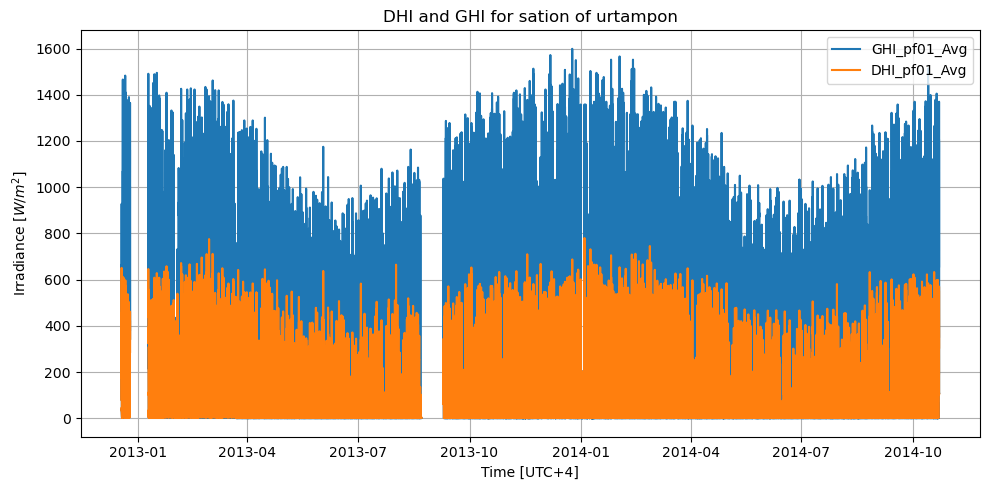

In [19]:
courbe_ghi_dhi(name_station_9 , df_station_9)

In [21]:
name_station_9, df_station_9 = affiche_data_reunion(reunion[0])
print(f'Station of {name_station_9}')

name_station_10, df_station_10 = affiche_data_reunion(reunion[1])
print(f'Station of {name_station_10}')

name_station_11, df_station_11 = affiche_data_reunion(reunion[2])
print(f'Station of {name_station_11}')

name_station_12, df_station_12 = affiche_data_reunion(reunion[3])
print(f'Station of {name_station_12}')

name_station_13, df_station_13 = affiche_data_reunion(reunion[4])
print(f'Station of {name_station_13}')

name_station_14, df_station_14 = affiche_data_reunion(reunion[5])
print(f'Station of {name_station_14}')

name_station_15, df_station_15 = affiche_data_reunion(reunion[6])
print(f'Station of {name_station_15}')

name_station_16, df_station_16 = affiche_data_reunion(reunion[7])
print(f'Station of {name_station_16}')

name_station_17, df_station_17 = affiche_data_reunion(reunion[8])
print(f'Station of {name_station_17}')

name_station_18, df_station_18 = affiche_data_reunion(reunion[9])
print(f'Station of {name_station_18}')

name_station_19, df_station_19 = affiche_data_reunion(reunion[10])
print(f'Station of {name_station_19}')

name_station_20, df_station_20 = affiche_data_reunion(reunion[11])
print(f'Station of {name_station_20}')

name_station_21, df_station_21 = affiche_data_reunion(reunion[12])
print(f'Station of {name_station_21}')

name_station_22, df_station_22 = affiche_data_reunion(reunion[13])
print(f'Station of {name_station_22}')

name_station_23, df_station_23 = affiche_data_reunion(reunion[14])
print(f'Station of {name_station_23}')

name_station_24, df_station_24 = affiche_data_reunion(reunion[15])
print(f'Station of {name_station_24}')

name_station_25, df_station_25 = affiche_data_reunion(reunion[16])
print(f'Station of {name_station_25}')

name_station_26, df_station_26 = affiche_data_reunion(reunion[17])
print(f'Station of {name_station_26}')

name_station_27, df_station_27 = affiche_data_reunion(reunion[18])
print(f'Station of {name_station_27}')

name_station_28, df_station_28 = affiche_data_reunion(reunion[19])
print(f'Station of {name_station_28}')

name_station_29, df_station_29 = affiche_data_reunion(reunion[20])
print(f'Station of {name_station_29}')

name_station_30, df_station_30 = affiche_data_reunion(reunion[21])
print(f'Station of {name_station_30}')

name_station_31, df_station_31 = affiche_data_reunion(reunion[22])
print(f'Station of {name_station_31}')

name_station_32, df_station_32 = affiche_data_reunion(reunion[23])
print(f'Station of {name_station_32}')

name_station_33, df_station_33 = affiche_data_reunion(reunion[24])
print(f'Station of {name_station_33}')

name_station_34, df_station_34 = affiche_data_reunion(reunion[25])
print(f'Station of {name_station_34}')

name_station_35, df_station_35 = affiche_data_reunion(reunion[26])
print(f'Station of {name_station_35}')

name_station_36, df_station_36 = affiche_data_reunion(reunion[27])
print(f'Station of {name_station_36}')


Station of urtampon
Station of urmoufia
Station of urbsrnsec
Station of urbsrn
Station of saintpaulcarat
Station of saintlouisjeanjoly
Station of saintjosephmairie
Station of sainterosemairie
Station of plaineparcnational
Station of pitondesneiges
Station of oldbsrnsec
Station of oldbsrn
Station of observatoirevolcan
Station of marla
Station of leportmairie
Station of leportbarbusse
Station of edfsaintpierre
Station of edfsaintleu
Station of edfsaintandre
Station of edflapossession
Station of edfboisdenefles
Station of craterebory
Station of cilaosthermes
Station of cilaospiscine
Station of cilaosbrassec
Station of cavernedufour
Station of braspanonmoreau
Station of aurere


In [22]:
df_station_9.to_csv(f'data_brute/reunion/{name_station_9}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_9}')

df_station_10.to_csv(f'data_brute/reunion/{name_station_10}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_10}')

df_station_11.to_csv(f'data_brute/reunion/{name_station_11}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_11}')

df_station_12.to_csv(f'data_brute/reunion/{name_station_12}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_12}')

df_station_13.to_csv(f'data_brute/reunion/{name_station_13}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_13}')

df_station_14.to_csv(f'data_brute/reunion/{name_station_14}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_14}')

df_station_15.to_csv(f'data_brute/reunion/{name_station_15}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_15}')

df_station_16.to_csv(f'data_brute/reunion/{name_station_16}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_16}')

df_station_17.to_csv(f'data_brute/reunion/{name_station_17}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_17}')

df_station_18.to_csv(f'data_brute/reunion/{name_station_18}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_18}')

df_station_19.to_csv(f'data_brute/reunion/{name_station_19}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_19}')

df_station_20.to_csv(f'data_brute/reunion/{name_station_20}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_20}')

df_station_21.to_csv(f'data_brute/reunion/{name_station_21}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_21}')

df_station_22.to_csv(f'data_brute/reunion/{name_station_22}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_22}')

df_station_23.to_csv(f'data_brute/reunion/{name_station_23}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_23}')

df_station_24.to_csv(f'data_brute/reunion/{name_station_24}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_24}')

df_station_25.to_csv(f'data_brute/reunion/{name_station_25}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_25}')

df_station_26.to_csv(f'data_brute/reunion/{name_station_26}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_26}')

df_station_27.to_csv(f'data_brute/reunion/{name_station_27}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_27}')

df_station_28.to_csv(f'data_brute/reunion/{name_station_28}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_28}')

df_station_29.to_csv(f'data_brute/reunion/{name_station_29}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_29}')

df_station_30.to_csv(f'data_brute/reunion/{name_station_30}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_30}')

df_station_31.to_csv(f'data_brute/reunion/{name_station_31}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_31}')

df_station_32.to_csv(f'data_brute/reunion/{name_station_32}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_32}')

df_station_33.to_csv(f'data_brute/reunion/{name_station_33}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_33}')

df_station_34.to_csv(f'data_brute/reunion/{name_station_34}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_34}')

df_station_35.to_csv(f'data_brute/reunion/{name_station_35}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_35}')

df_station_36.to_csv(f'data_brute/reunion/{name_station_36}_irrad.csv', sep=';', index=True)
print(f'Station of {name_station_36}')


Station of urtampon
Station of urmoufia
Station of urbsrnsec
Station of urbsrn
Station of saintpaulcarat
Station of saintlouisjeanjoly
Station of saintjosephmairie
Station of sainterosemairie
Station of plaineparcnational
Station of pitondesneiges
Station of oldbsrnsec
Station of oldbsrn
Station of observatoirevolcan
Station of marla
Station of leportmairie
Station of leportbarbusse
Station of edfsaintpierre
Station of edfsaintleu
Station of edfsaintandre
Station of edflapossession
Station of edfboisdenefles
Station of craterebory
Station of cilaosthermes
Station of cilaospiscine
Station of cilaosbrassec
Station of cavernedufour
Station of braspanonmoreau
Station of aurere


## Comores

In [9]:
len(comores)

2

In [10]:
name_station_37 , df_station_37 = affiche_data_reunion(comores[0])
print(f'Station of {name_station_37}')

name_station_38 , df_station_38 = affiche_data_reunion(comores[1])
print(f'Station of {name_station_38}')

Station of ouani
Station of hahaya


In [12]:
df_station_37.to_csv(f'data_brute/comores/{name_station_37}_irrad.csv', sep=';', index=True)  
df_station_38.to_csv(f'data_brute/comores/{name_station_38}_irrad.csv', sep=';', index=True) 

# Save raw data to csv files

In [ ]:
df_station_35.to_csv(f'data_brute/reunion/{name_station_35}_irrad.csv', sep=';', index=True)

<h2 style="color:red; text-align:center;"> The different curves of the raw data
</h2>

In [50]:
def courbe_ghi_dhi(name , df_station):
    i=0
    df_station.index = pd.to_datetime(df_station.index)
    ligne , colon = df_station.shape
    plt.figure(figsize=(10, 5))  # Taille de la figure
    for col in df_station.columns:
        i=i+1
        print(f'Colonne :{i}/{colon}') 
        plt.plot(df_station.index, df_station[col], label=col,linewidth=0.5)
        plt.legend(loc='best')
    
    # Ajouter le titre et les légendes
    plt.title(f'DHI and GHI for sation of {name}')
    plt.xlabel('Time [UTC+4]')
    plt.ylabel('Irradiance [$W/m^2$]')
    
    # Afficher le graphique
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return 

# Imporation csv files

In [48]:
# Importer un fichier CSV avec un séparateur ';' et sans en-têtes de colonnes
df_test = pd.read_csv('data_brute/south_africa/durban_irrad.csv', sep=';', index_col=0)
df_test

,GHI_pp01_Avg,DHI_pp01_Avg
2013-08-01 04:00:00+04:00,NaN,NaN
2013-08-01 04:01:00+04:00,NaN,NaN
2013-08-01 04:02:00+04:00,NaN,NaN
2013-08-01 04:03:00+04:00,NaN,NaN
2013-08-01 04:04:00+04:00,NaN,NaN
...,...,...
2018-10-25 03:55:00+04:00,NaN,NaN
2018-10-25 03:56:00+04:00,NaN,NaN
2018-10-25 03:57:00+04:00,NaN,NaN
2018-10-25 03:58:00+04:00,NaN,NaN


Colonne :1/2
Colonne :2/2


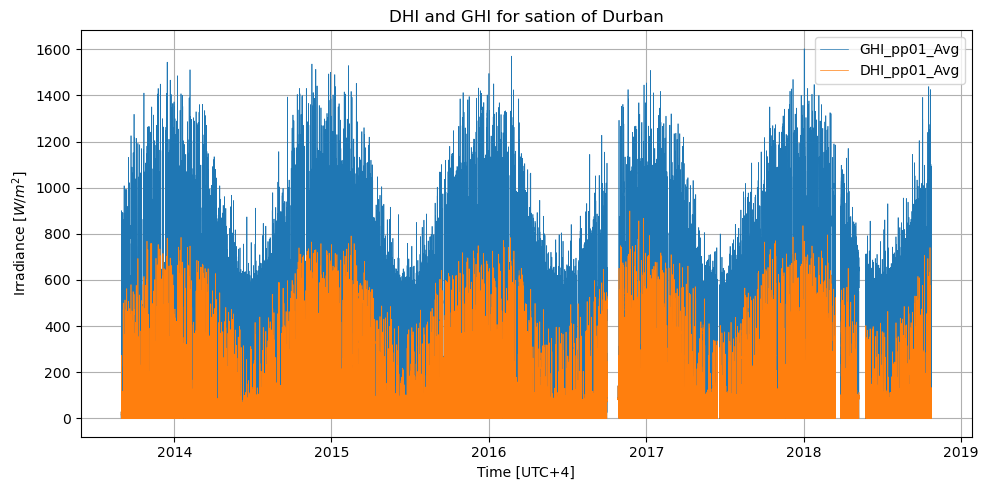

In [51]:
courbe_ghi_dhi('Durban' , df_test)

## South Africa

In [ ]:
df_durban = pd.read_csv('data_brute/south_africa/durban_irrad.csv', sep=';', index_col=0)

Colonne :1/2
Colonne :2/2


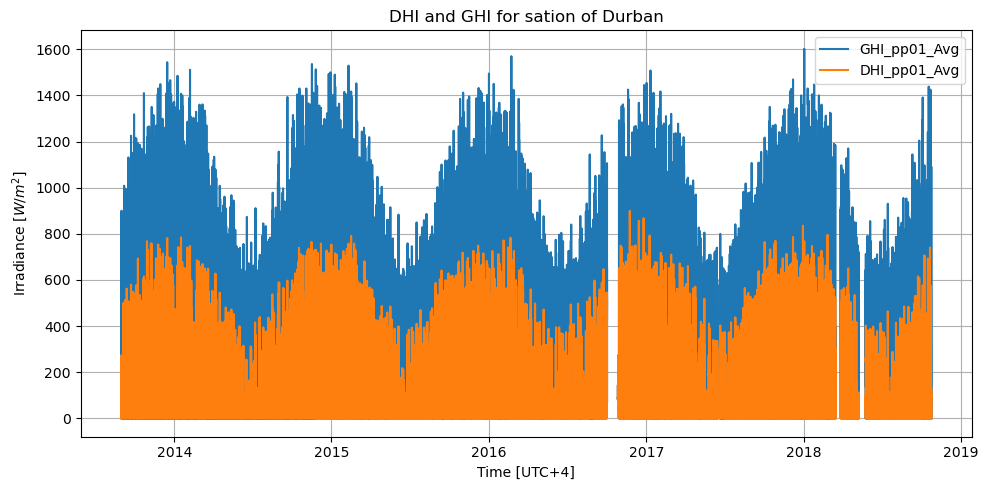

In [47]:
courbe_ghi_dhi('Durban' , df_durban)

## Seychelles

In [52]:
df_anseboileau = pd.read_csv('data_brute/seychelles/anseboileau_irrad.csv', sep=';', index_col=0)
df_amitie = pd.read_csv('data_brute/seychelles/amitie_irrad.csv', sep=';', index_col=0)

In [ ]:
courbe_ghi_dhi('Anseboileau' , df_anseboileau)
courbe_ghi_dhi('Amitie' , df_amitie)